In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Cleaning the Data

In [97]:
df = pd.read_csv('/content/data_new.csv')
data_df = df.reset_index()
total_data = len(data_df)
data_df.info()
data_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48784 entries, 0 to 48783
Columns: 161 entries, index to gagne_sum_t
dtypes: float64(22), int64(138), object(1)
memory usage: 59.9+ MB


,index,risk_score_t,program_enrolled_t,cost_t,cost_avoidable_t,bps_mean_t,ghba1c_mean_t,hct_mean_t,cre_mean_t,ldl_mean_t,...,trig_min-high_tm1,trig_min-normal_tm1,trig_mean-low_tm1,trig_mean-high_tm1,trig_mean-normal_tm1,trig_max-low_tm1,trig_max-high_tm1,trig_max-normal_tm1,gagne_sum_tm1,gagne_sum_t
0,0,1.987430,0,1200.0,0.0,NaN,5.4,NaN,1.110000,194.0,...,0,0,0,0,0,0,0,0,0,0
1,1,7.677934,0,2600.0,0.0,119.0,5.5,40.4,0.860000,93.0,...,0,1,0,0,1,0,0,1,4,3
2,2,0.407678,0,500.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,3,0.798369,0,1300.0,0.0,117.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,17.513165,0,1100.0,0.0,116.0,NaN,34.1,1.303333,53.0,...,0,0,0,0,0,0,0,0,1,1


In [100]:
#Cleaning demographic variables
def gender_cleaning(obs):
  if obs == 1:
    return "Female"
  elif obs == 0:
    return "Male"

age_data = data_df[['dem_age_band_18-24_tm1','dem_age_band_25-34_tm1','dem_age_band_35-44_tm1','dem_age_band_45-54_tm1','dem_age_band_55-64_tm1','dem_age_band_65-74_tm1','dem_age_band_75+_tm1']]
age_counts = age_data.sum()
melted_age = pd.melt(age_data)
melted_age = melted_age[melted_age['value'] == 1]

data_df['dem_gender'] = data_df['dem_female'].apply(lambda x: gender_cleaning(x))

In [101]:
# DEMOGRAPHIC DATA
def print_plots():
  # Gender chart
  sns.countplot(x='dem_gender', data=data_df, palette='Paired')
  plt.title("Count by Gender")
  plt.xlabel("Gender")
  plt.ylabel("Count")
  plt.show()

  gender_count = pd.crosstab(index = data_df['dem_gender'], columns = 'Count')
  gender_count.columns = ['Count']
  gender_count['Percentage'] = gender_count.sum(axis=1)
  gender_count['Percentage'] = gender_count['Percentage'].div(total_data) * 100
  display(gender_count)

  # Race chart
  sns.countplot(x='race', data=data_df, palette='Set2')
  plt.title("Count by Race")
  plt.xlabel("Race")
  plt.ylabel("Count")
  plt.show()

  race_count = pd.crosstab(index = data_df['race'], columns = 'Count')
  race_count.columns = ['Count']
  race_count['Percentage'] = race_count.sum(axis=1)
  race_count['Percentage'] = race_count['Percentage'].div(total_data) * 100
  display(race_count)

  # Age band chart
  plt.figure(figsize=(15, 6))
  sns.barplot(x=age_counts.index, y=age_counts.values)
  plt.xticks(range(len(age_counts)), [label.split('_')[3] for label in age_counts.index])
  plt.title('Counts for Each Age Band')
  plt.xlabel('Age Band')
  plt.ylabel('Count')
  plt.show()

  age_count = pd.crosstab(index=melted_age['variable'], columns=melted_age['value'])
  age_count.index = ['18-24', '25-34', '35-44', '45-54', '55-64','65-74','75+']
  age_count.columns = ['Count']
  age_count['Percentage'] = age_count.sum(axis=1)
  total_age = age_counts.sum()
  age_count['Percentage'] = age_count['Percentage'].div(total_age) * 100
  display(age_count)

In [109]:
from scipy.stats import percentileofscore

def create_table(df, race, total_n):
    df = df.copy()
    table_list = []

    n = len(df) * 1.0
    table_list.append(('n (patient-years)', '{:,}'.format(n)))

    # Demographics

    table_list.append(('Demographics', '---'))
    table_list.append(('Female', '{:.2f}'.format(df['dem_female'].sum() / n)))
    table_list.append(('Age 18-24','{:.2f}'.format(df['dem_age_band_18-24_tm1'].sum() / n)))
    table_list.append(('Age 25-34', '{:.2f}'.format(df['dem_age_band_25-34_tm1'].sum() / n)))
    table_list.append(('Age 35-44', '{:.2f}'.format(df['dem_age_band_35-44_tm1'].sum() / n)))
    table_list.append(('Age 45-54', '{:.2f}'.format(df['dem_age_band_45-54_tm1'].sum() / n)))
    table_list.append(('Age 55-64', '{:.2f}'.format(df['dem_age_band_55-64_tm1'].sum() / n)))
    table_list.append(('Age 65-74', '{:.2f}'.format(df['dem_age_band_65-74_tm1'].sum() / n)))
    table_list.append(('Age 75+', '{:.2f}'.format(df['dem_age_band_75+_tm1'].sum() / n)))

    # Care management program

    table_list.append(('Care management program', '---'))
    df['risk_score_t_percentile'] = df['risk_score_t'].apply(lambda x: percentileofscore(df['risk_score_t'], x))
    table_list.append(('Algorithm score (mean percentile)', '{:.0f}'.format(df['risk_score_t_percentile'].mean())))
    # table_list.append(('Race composition of program (%)', '{:.1f}'.format(n / total_n * 100)))

    # Care utilization

    table_list.append(('Care utilization', '---'))
    table_list.append(('Actual cost (mean)', '${:,.0f}'.format(df['cost_t'].mean())))

    # Mean biomarker values

    table_list.append(('Mean biomarkers', '---'))
    table_list.append(('HbA1c', '{:.1f}'.format(df['ghba1c_mean_t'].mean())))
    table_list.append(('Systolic BP', '{:.1f}'.format(df['bps_mean_t'].mean())))
    table_list.append(('Creatinine', '{:.1f}'.format(df['cre_mean_t'].mean())))
    table_list.append(('Hematocrit', '{:.1f}'.format(df['hct_mean_t'].mean())))
    table_list.append(('LDL', '{:.1f}'.format(df['ldl_mean_t'].mean())))

    # Active chronic illnesses (comorbidities)

    table_list.append(('Active chronic illnesses (mean comorbidities)', '---'))
    table_list.append(('Total number of active illnesses', '{:.2f}'.format(df['gagne_sum_t'].mean())))
    table_list.append(('Hypertension',
        '{:.2f}'.format(df['hypertension_elixhauser_tm1'].mean())))
    table_list.append(('Diabetes, uncomplicated', '{:.2f}'.format(df['uncompdiabetes_elixhauser_tm1'].mean())))
    table_list.append(('Arrythmia',
        '{:.2f}'.format(df['arrhythmia_elixhauser_tm1'].mean())))
    table_list.append(('Hypothyroid', '{:.2f}'.format(df['hypothyroid_elixhauser_tm1'].mean())))
    table_list.append(('Obesity', '{:.2f}'.format(df['obesity_elixhauser_tm1'].mean())))
    table_list.append(('Pulmonary disease', '{:.2f}'.format(df['pulmonarydz_romano_tm1'].mean())))
    table_list.append(('Cancer', '{:.2f}'.format(df['tumor_romano_tm1'].mean())))
    table_list.append(('Depression', '{:.2f}'.format(df['depression_elixhauser_tm1'].mean())))
    table_list.append(('Anemia', '{:.2f}'.format(df['anemia_elixhauser_tm1'].mean())))
    table_list.append(('Arthritis', '{:.2f}'.format(df['arthritis_elixhauser_tm1'].mean())))
    table_list.append(('Renal failure', '{:.2f}'.format(df['renal_elixhauser_tm1'].mean())))
    table_list.append(('Electrolyte disorder', '{:.2f}'.format(df['electrolytes_elixhauser_tm1'].mean())))
    table_list.append(('Heart failure', '{:.2f}'.format(df['chf_romano_tm1'].mean())))
    table_list.append(('Psychosis', '{:.2f}'.format(df['psychosis_elixhauser_tm1'].mean())))
    table_list.append(('Valvular disease', '{:.2f}'.format(df['valvulardz_elixhauser_tm1'].mean())))
    table_list.append(('Stroke', '{:.2f}'.format(df['hemiplegia_romano_tm1'].mean())))
    table_list.append(('Peripheral vascular disease', '{:.2f}'.format(df['pvd_elixhauser_tm1'].mean())))
    table_list.append(('Diabetes, complicated', '{:.2f}'.format(df['compdiabetes_elixhauser_tm1'].mean())))
    table_list.append(('Heart attack', '{:.2f}'.format(df['myocardialinfarct_romano_tm1'].mean())))
    table_list.append(('Liver disease', '{:.2f}'.format(df['liver_elixhauser_tm1'].mean())))

    table1_df = pd.DataFrame(table_list, columns=['Descriptive stats', race])

    return table1_df

def build_table():

    total_n = total_data * 1.0

    # Split by white, Black patients
    white_df = data_df[data_df['race'] == 'white']
    black_df = data_df[data_df['race'] == 'black']

    white_table = create_table(white_df, 'White', total_n)
    black_table = create_table(black_df, 'Black', total_n)

    # Merge white table and Black table for final table
    table = white_table.merge(black_table)

    display(table)

In [108]:
build_table()

,Descriptive stats,White,Black
0,n (patient-years),"43,202.0","5,582.0"
1,Demographics,---,---
2,Female,0.63,0.66
3,Age 18-24,0.04,0.04
4,Age 25-34,0.11,0.11
5,Age 35-44,0.19,0.20
6,Age 45-54,0.24,0.25
7,Age 55-64,0.20,0.18
8,Age 65-74,0.14,0.14
9,Age 75+,0.07,0.07


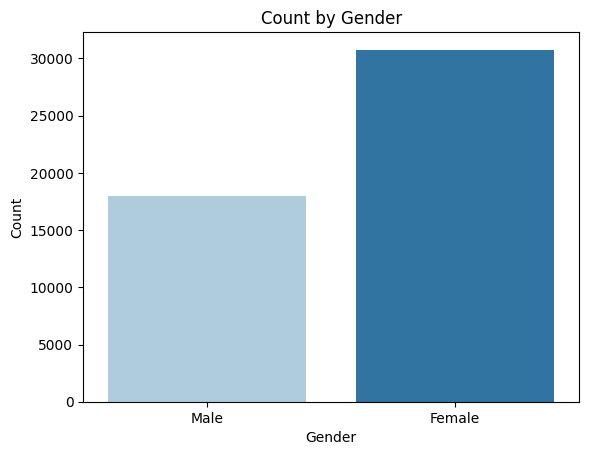

,Count,Percentage
dem_gender,,
Female,30763,63.05961
Male,18021,36.94039


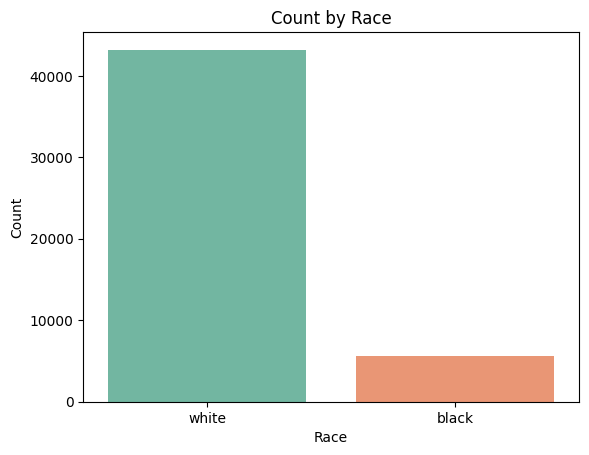

,Count,Percentage
race,,
black,5582,11.442276
white,43202,88.557724


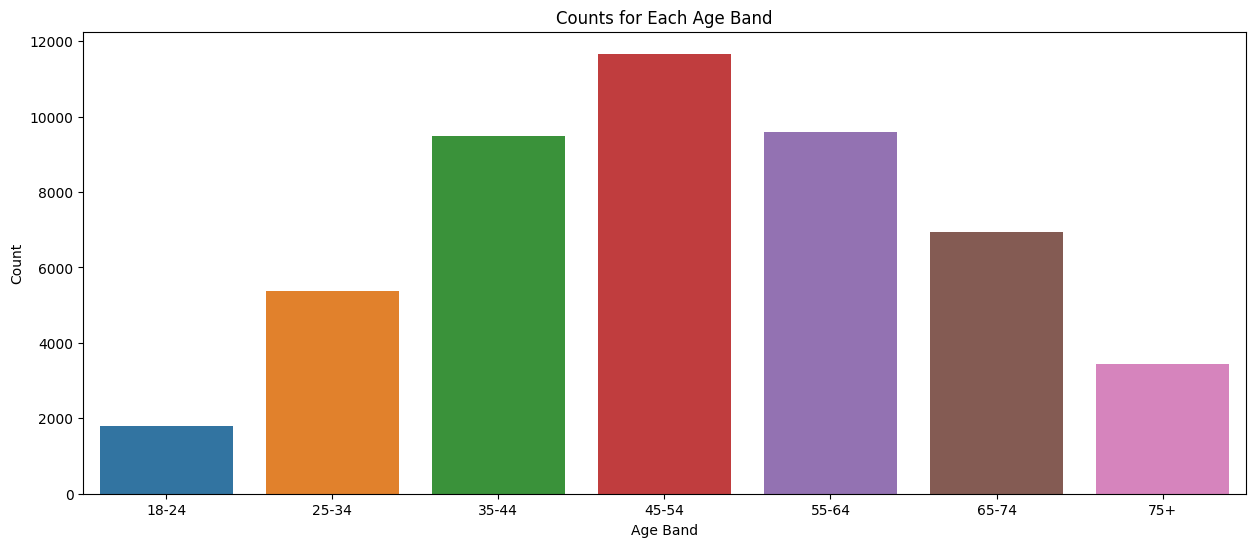

,Count,Percentage
18-24,1799,3.725872
25-34,5380,11.142407
35-44,9481,19.635904
45-54,11665,24.159142
55-64,9590,19.861652
65-74,6940,14.373291
75+,3429,7.101731


In [105]:
print_plots()

In [ ]:
%cd /content/drive/MyDrive/Github/

[Errno 2] No such file or directory: '/content/drive/MyDrive/Github/'
/content
